<a href="https://colab.research.google.com/github/Pramuuu/Futurense_ML/blob/main/07_08_2024_leads_gen_work_exp_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# for solving problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Optional
# for filter warnings
import warnings
warnings.filterwarnings('ignore')
# for better plot visualization
plt.style.use('_mpl-gallery')
FONT = {'fontsize':20, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#145A32', 'color':'orange'} # for plot title


In [2]:
# importing requirement sklearn functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss


In [3]:
data = pd.read_excel('/content/Leads Generated.xlsx')
df = pd.DataFrame(data)
df

,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,lead_id.1,graduation_degree,graduation_percentage,work_experience,mapped,contacted,lsq_lead_stage,lsq_lead_owner,lsq_source
0,l:3587545764833355,2024-05-02 14:18:00,USP_S3_never-been-easier,USP_2_Lead-gen-1_220124,BM - US pathway Webinar Form - More Volume - N...,Facebook,l:3587545764833355,b.tech_cse,70.0,7,Mapped,Contacted,Not Interested,Janvi Aggarwal,Facebook
1,cc0da387-682c-4530-a79a-1168487410f0,2024-04-30 18:00:07,--,USP_Search_APTNTSKA_250124,NaN,Google,cc0da387-682c-4530-a79a-1168487410f0,B.Tech CSE,80.0,3 Years,NaN,NaN,NaN,NaN,NaN
2,10045c19-1c8d-4d63-a6bf-62d00a2f50ec,2024-03-21 02:25:55,Shreya,USP_Video_APTLTSKA_Lead-Gen_Keywords_050324,NaN,Google,10045c19-1c8d-4d63-a6bf-62d00a2f50ec,PG,50.0,1 Year,Mapped,NaN,Invalid phone number,Ankur chandra,GoogleAds
3,7e0db362-ebc3-4265-9131-d69bae5eb3f5,2024-03-17 06:40:21,--,USP_Search_APTNTSKA_250124,NaN,Google,7e0db362-ebc3-4265-9131-d69bae5eb3f5,Others,60.0,Fresher,Mapped,NaN,Invalid phone number,Chitwan Soni,GoogleAds
4,5f74bcc1-08a8-414d-a729-69d5071b4f53,2024-03-20 07:48:39,Shreya,USP_Video_APTLTSKA_Lead-Gen_Websites_050324,NaN,Google,5f74bcc1-08a8-414d-a729-69d5071b4f53,UG,100.0,10 Years,Mapped,NaN,Invalid phone number,Ayush Dixit,GoogleAds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32764,l:1287087698649474,2023-12-29 20:15:00,#9 ( Graphic ) - Study In The US,USP Masterclass Cold [ 31st Oct ] - Higher Int...,BM - US pathway Webinar Form - Higher Intent -...,Facebook,l:1287087698649474,"b.tech_(civil,_eee,_mech._,_etc.)",65.0,1,Mapped,Contacted,New Enquiry,Tarun Gupta,NaN
32765,l:752743646765142,2024-01-24 13:37:00,USP_Influencer_videoAd2,USP_Program_More-Volume_No Logic_India_220124,BM - US pathway Webinar Form - More Volume - N...,Facebook,l:752743646765142,others,65.0,1,Mapped,Contacted,Never Picked up,System,Facebook
32766,l:701943358682733,2024-03-21 06:19:00,USP_RIT_1_Getpaid,USP_MS + Coop Campaign_240224,BM - US pathway Webinar Form - More Volume - N...,Facebook,l:701943358682733,b.tech_cse,80.0,1,Mapped,Contacted,New Enquiry,Ankur chandra,Zoom Webinar
32767,ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6,2024-01-04 03:45:00,USP_Program_Linkedin_Static_C19_Dual-Course-white,US_Pathway_2_Lead_gen_3_241123,US Pathway Program final Form 110923,LinkedIn,ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6,"B.Tech (Civil, EEE, Mech. , etc.)",85.0,1,Mapped,Contacted,Not Interested,Abid Bhat,LinkedIn


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lead_id                32769 non-null  object        
 1   created_time           32769 non-null  datetime64[ns]
 2   Ad Name                32722 non-null  object        
 3   Campaign Name          32722 non-null  object        
 4   form_name              30430 non-null  object        
 5   platform               32769 non-null  object        
 6   lead_id.1              32769 non-null  object        
 7   graduation_degree      32763 non-null  object        
 8   graduation_percentage  32764 non-null  float64       
 9   work_experience        32762 non-null  object        
 10  mapped                 32058 non-null  object        
 11  contacted              30805 non-null  object        
 12  lsq_lead_stage         32097 non-null  object        
 13  l

In [ ]:
df.isna().sum().to_frame().T #checking missing values

,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,lead_id.1,graduation_degree,graduation_percentage,work_experience,mapped,contacted,lsq_lead_stage,lsq_lead_owner,lsq_source
0,0,0,47,47,2339,0,0,6,5,7,711,1964,672,607,765


In [ ]:
# check invalid valuse
for col in df:
  print(f"{col} has {df[col].nunique()} unique value")

lead_id has 32769 unique value
created_time has 29997 unique value
Ad Name has 134 unique value
Campaign Name has 40 unique value
form_name has 15 unique value
platform has 3 unique value
lead_id.1 has 32769 unique value
graduation_degree has 17 unique value
graduation_percentage has 11 unique value
work_experience has 27 unique value
mapped has 1 unique value
contacted has 1 unique value
lsq_lead_stage has 29 unique value
lsq_lead_owner has 85 unique value
lsq_source has 51 unique value


In [ ]:
# now check duplicated data
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32764    False
32765    False
32766    False
32767    False
32768    False
Length: 32769, dtype: bool

In [5]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(23)

Your selected dataframe has 15 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
form_name,2339,7.1
contacted,1964,6.0
lsq_source,765,2.3
mapped,711,2.2
lsq_lead_stage,672,2.1
lsq_lead_owner,607,1.9
Ad Name,47,0.1
Campaign Name,47,0.1
work_experience,7,0.0
graduation_degree,6,0.0


In [7]:
data1 = pd.read_excel('/content/updated_dataset.xlsx')
df1 = pd.DataFrame(data1)
df1

,dates,campaign_name,campaign_start_date,creative_name,total_spent,impressions,clicks,click_through_rate,leads,platform,adset_name
0,2024-04-29,USP_Search_APTNTSKA_250124,25-01-2024,--,6766.15,1250,220,0.176000,25.0,Google,GMAT/GRE
1,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,05-04-2024,#7 ( Graphic ) - Get A Free Pass,946.38,3154,9,0.285352,1.0,Facebook,USP-2_KA_TN_050424
2,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,05-04-2024,USP_S3_never-been-easier,170.40,2695,8,0.296846,0.0,Facebook,USP-2_KA_TN_050424
3,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,05-04-2024,USP_S4_Do-you-have,55.65,577,2,0.346620,0.0,Facebook,USP-2_KA_TN_050424
4,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,05-04-2024,USP_S1_We-guarantee,296.94,1466,10,0.682128,1.0,Facebook,USP-2_AP_TS_050424
...,...,...,...,...,...,...,...,...,...,...,...
28529,2024-03-12,USP_MS + Coop Campaign_240224,24-02-2024,USP_RG_VideoAd5,67.18,268,1,0.373134,0.0,Facebook,MS + Coop KA&TN Ad set - 240224
28530,2024-03-12,USP_MS + Coop Campaign_240224,24-02-2024,USP_RG_VideoAd5,50.65,75,1,1.333333,0.0,Facebook,MS + Coop All India Ad set - 240224
28531,2024-03-12,USP Study Abroad_Generic_240224,24-02-2024,USP_Webinar_Saturdayfuture - Copy,11.34,28,0,0.000000,0.0,Facebook,AP&TS Generic Leads Ad Set_240224
28532,2024-03-12,USP Study Abroad_Generic_240224,24-02-2024,USP_Webinar_Saturdayfuture - Copy,136.97,134,0,0.000000,0.0,Facebook,KA&TN Generic Leads Ad Set_240224


In [8]:
# check invalid valuse
for col in df1:
  print(f"{col} has {df1[col].nunique()} unique value")

dates has 184 unique value
campaign_name has 41 unique value
campaign_start_date has 14 unique value
creative_name has 146 unique value
total_spent has 17208 unique value
impressions has 6579 unique value
clicks has 497 unique value
click_through_rate has 7006 unique value
leads has 124 unique value
platform has 3 unique value
adset_name has 69 unique value


In [9]:
# Rename columns to ensure they match
df = df.rename(columns={'Campaign Name': 'campaign_name'})
df1 = df1.rename(columns={'campaign_name': 'campaign_name'})

# Verify the columns after renaming
print("Columns in Leads generated dataset after renaming:", df.columns)
print("Columns in updated datasheet dataset after renaming:", df1.columns)

# Find the common lead_id values
common_campaign_name = pd.merge(df[['campaign_name']], df1[['campaign_name']], on='campaign_name', how='inner')

# Count the number of common lead_id values
common_campaign_name_count = common_campaign_name['campaign_name'].nunique()
print(f"\nNumber of common campaign_name: {common_campaign_name_count}")

Columns in Leads generated dataset after renaming: Index(['lead_id', 'created_time', 'Ad Name', 'campaign_name', 'form_name',
       'platform', 'lead_id.1', 'graduation_degree', 'graduation_percentage',
       'work_experience', 'mapped', 'contacted', 'lsq_lead_stage',
       'lsq_lead_owner', 'lsq_source'],
      dtype='object')
Columns in updated datasheet dataset after renaming: Index(['dates', 'campaign_name', 'campaign_start_date', 'creative_name',
       'total_spent', 'impressions', 'clicks', 'click_through_rate', 'leads',
       'platform', 'adset_name'],
      dtype='object')

Number of common campaign_name: 40


In [11]:
 #Number of each type of column
df1.dtypes.value_counts()

object            5
float64           3
int64             2
datetime64[ns]    1
Name: count, dtype: int64

In [12]:
# Convert the 'created_time' column to datetime
df['created_time'] = pd.to_datetime(df['created_time'], format='%d-%m-%Y %H:%M')


In [13]:
# Extract hour from 'created_time'
df['hour'] = df['created_time'].dt.hour


In [14]:
# Define function to categorize parts of the day
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'part_of_day'
df['part_of_day'] = df['hour'].apply(categorize_hour)


In [15]:
# Count leads by part of the day
leads_by_part_of_day = df['part_of_day'].value_counts().sort_index()
print(leads_by_part_of_day)


part_of_day
Afternoon     9916
Evening      10016
Morning       7820
Night         5017
Name: count, dtype: int64


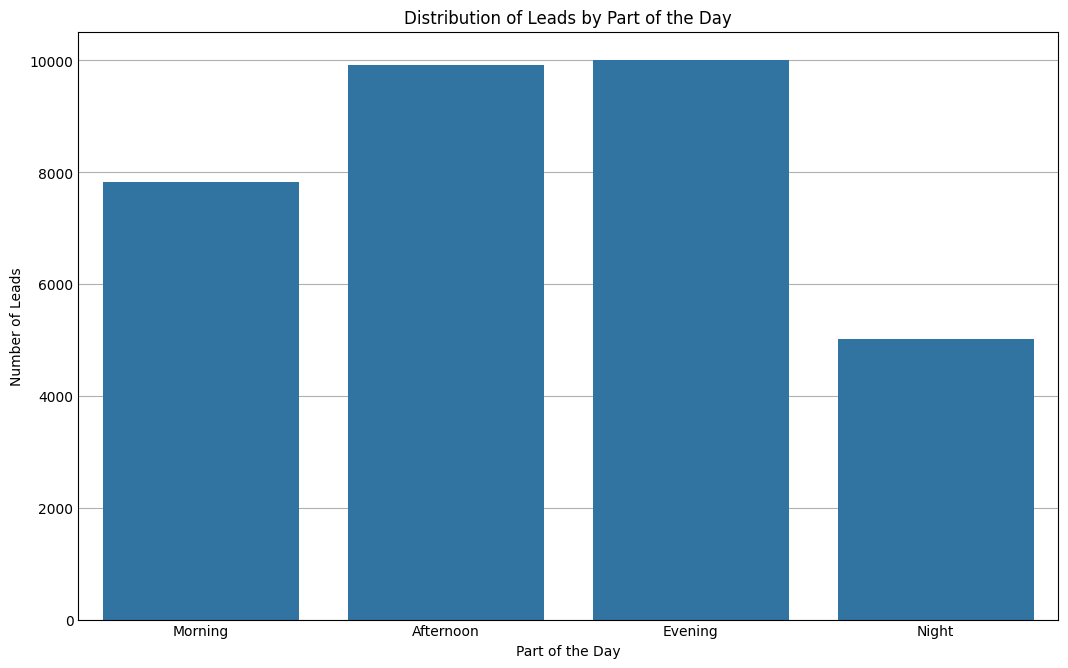

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='part_of_day', data=df, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Distribution of Leads by Part of the Day')
plt.xlabel('Part of the Day')
plt.ylabel('Number of Leads')
plt.show()


In [17]:
# Count leads by hour
leads_by_hour = df['hour'].value_counts().sort_index()
print(leads_by_hour)


hour
0     1500
1     1087
2      755
3      614
4      507
5      554
6      769
7     1107
8     1369
9     1432
10    1495
11    1648
12    1648
13    1666
14    1643
15    1736
16    1631
17    1592
18    1614
19    1639
20    1739
21    1914
22    2003
23    1107
Name: count, dtype: int64


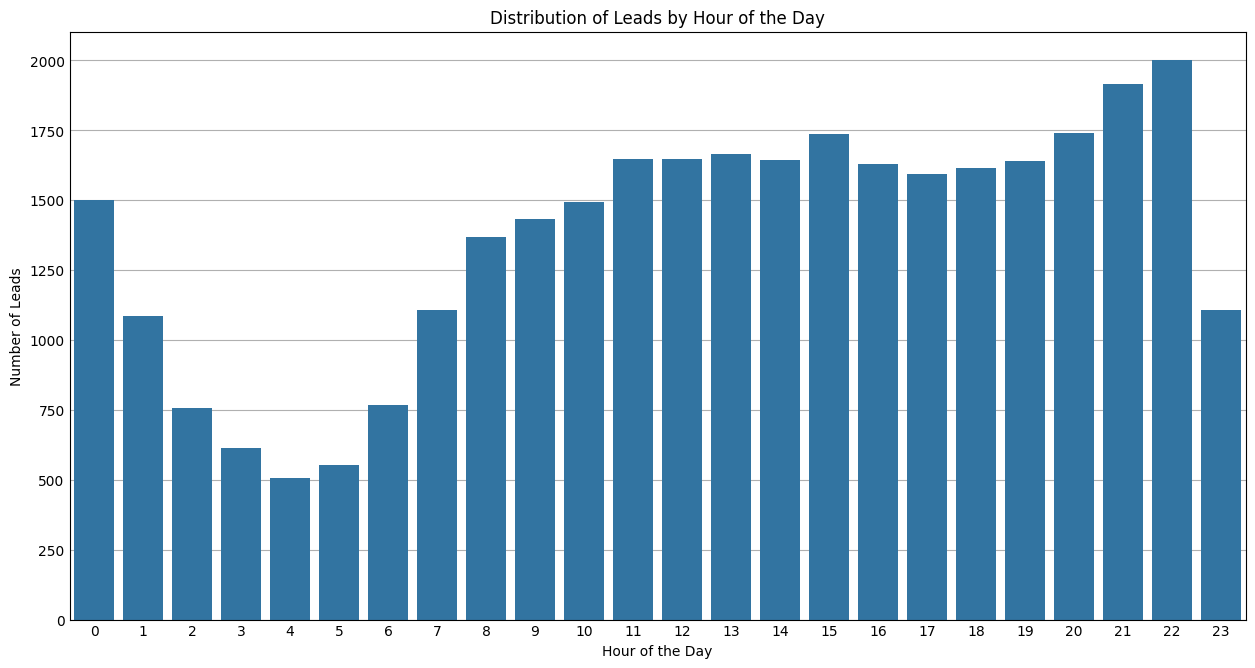

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df, order=range(24))
plt.title('Distribution of Leads by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Leads')
plt.xticks(range(24))
plt.show()


In [19]:
# Count leads by platform
leads_by_platform = df['platform'].value_counts()
print(leads_by_platform)


platform
Facebook    27557
LinkedIn     2871
Google       2341
Name: count, dtype: int64


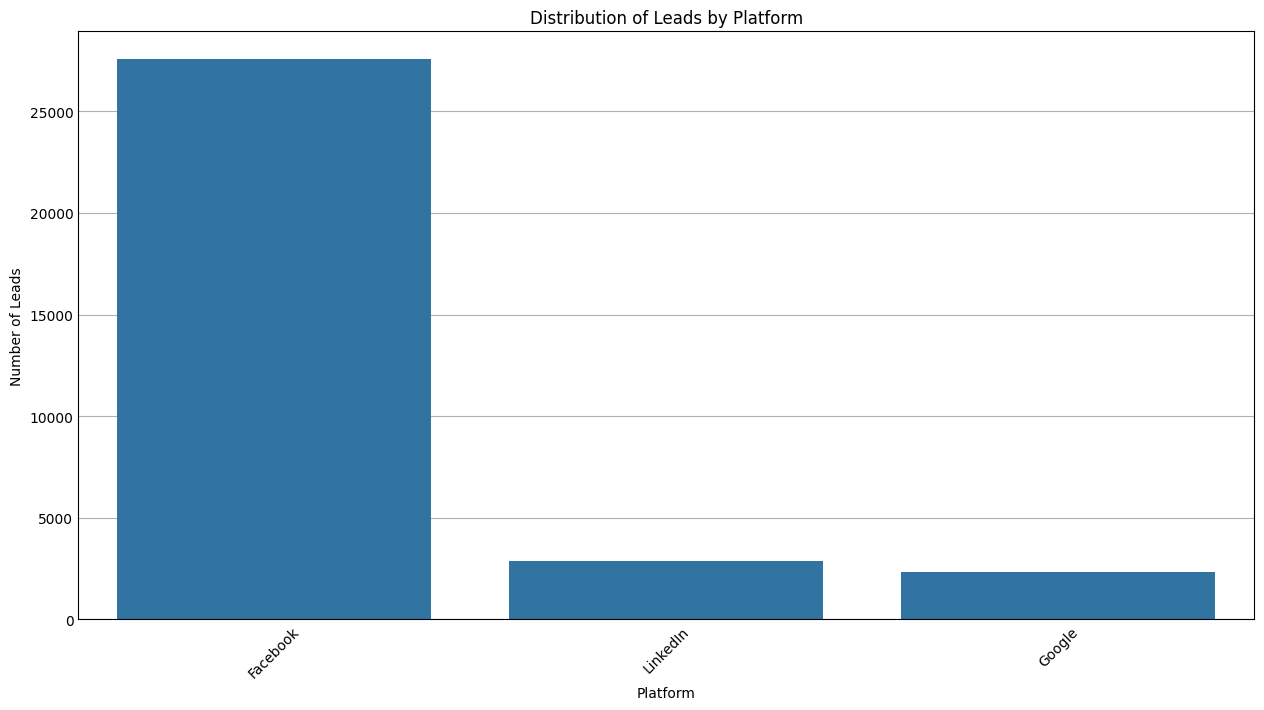

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='platform', data=df, order=leads_by_platform.index)
plt.title('Distribution of Leads by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.show()


In [21]:
# Extract year from 'created_time'
df['year'] = df['created_time'].dt.year


In [22]:
# Count leads by year
leads_by_year = df['year'].value_counts().sort_index()
print(leads_by_year)


year
2023     5058
2024    27711
Name: count, dtype: int64


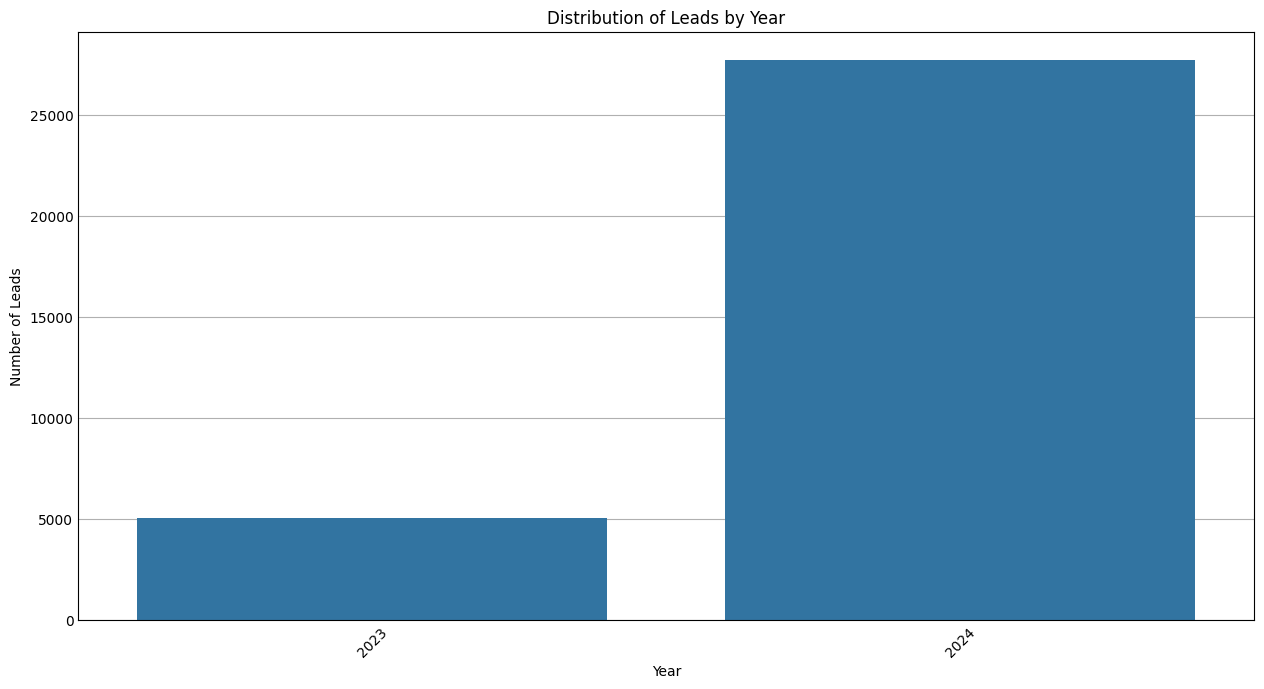

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df, order=leads_by_year.index)
plt.title('Distribution of Leads by Year')
plt.xlabel('Year')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.show()


In [24]:
# Count leads by graduation degree
leads_by_graduation_degree = df['graduation_degree'].value_counts()
print(leads_by_graduation_degree)


graduation_degree
others                               12606
b.tech_(civil,_eee,_mech._,_etc.)     5392
b.tech_cse                            3972
b.tech_it                             1883
mca                                   1551
Others                                1420
m.tech                                1328
B.Tech (Civil, EEE, Mech. , etc.)     1323
B.Tech CSE                             882
b.tech_(mech,_civil,_e&tc,_etc.)       823
UG                                     536
B.Tech IT                              323
PG                                     281
M.Tech                                 223
B.Tech (Civil, ME, ECE, EEE etc.)      147
MCA                                     72
b.tech/be                                1
Name: count, dtype: int64


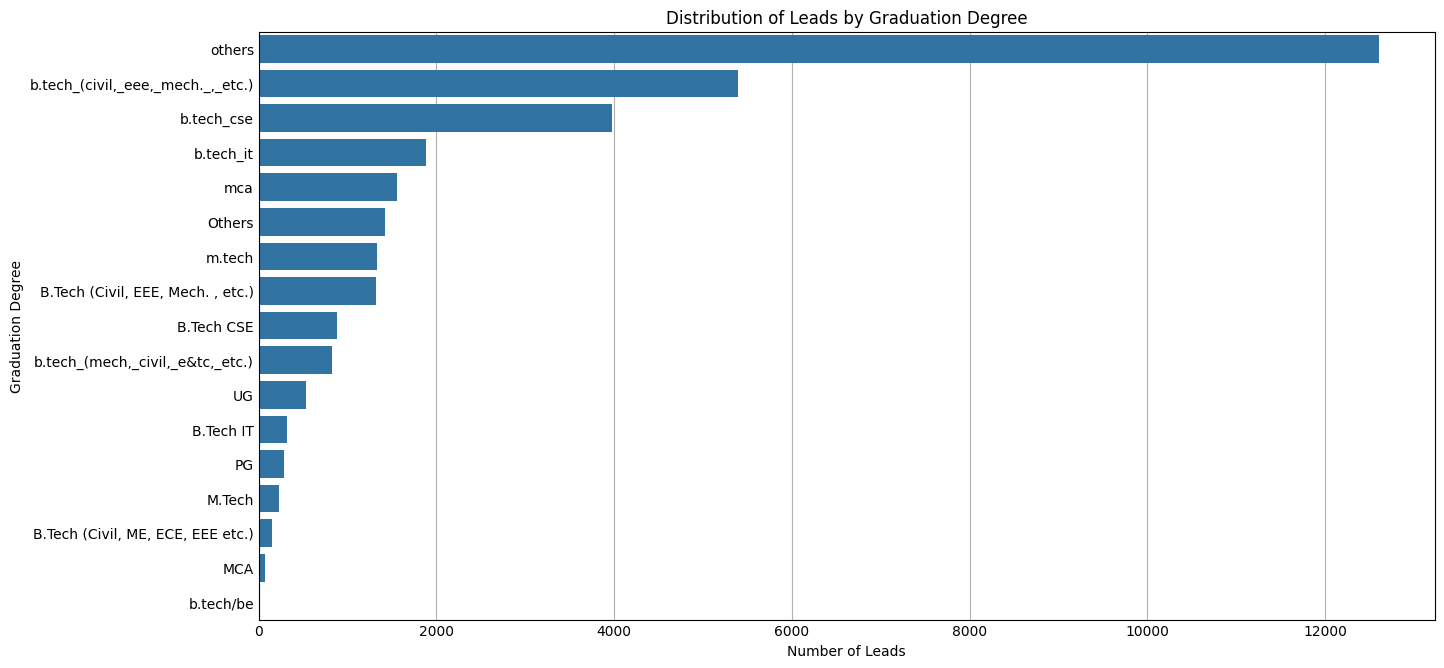

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='graduation_degree', data=df, order=leads_by_graduation_degree.index)
plt.title('Distribution of Leads by Graduation Degree')
plt.xlabel('Number of Leads')
plt.ylabel('Graduation Degree')
plt.show()


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['graduation_degree'] = le.fit_transform(data['graduation_degree'])
data['platform'] = le.fit_transform(data['platform'])
data['Ad Name'] = le.fit_transform(data['Ad Name'].astype(str))
data['Campaign Name'] = le.fit_transform(data['Campaign Name'].astype(str))
data['form_name'] = le.fit_transform(data['form_name'].astype(str))


In [27]:
features = ['platform', 'Ad Name', 'Campaign Name', 'form_name', 'graduation_percentage', 'work_experience']
X = data[features]
y = data['graduation_degree']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


ValueError: could not convert string to float: '10 Years'

In [30]:
import re

def convert_work_experience(work_exp):
    if pd.isnull(work_exp):
        return 0  # or some other default value or imputation method
    match = re.match(r'(\d+)', str(work_exp))
    if match:
        return int(match.group(1))
    return 0  # default value if no match

data['work_experience'] = data['work_experience'].apply(convert_work_experience)


In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ValueError: could not convert string to float: '10 Years'

In [32]:
import re

def convert_work_experience(work_exp):
    if pd.isnull(work_exp):
        return 0  # or some other default value or imputation method
    match = re.match(r'(\d+)', str(work_exp))
    if match:
        return int(match.group(1))
    return 0  # default value if no match

data['work_experience'] = data['work_experience'].apply(convert_work_experience)


In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['graduation_degree'] = le.fit_transform(data['graduation_degree'])
data['platform'] = le.fit_transform(data['platform'])
data['Ad Name'] = le.fit_transform(data['Ad Name'].astype(str))
data['Campaign Name'] = le.fit_transform(data['Campaign Name'].astype(str))
data['form_name'] = le.fit_transform(data['form_name'].astype(str))

In [34]:
features = ['platform', 'Ad Name', 'Campaign Name', 'form_name', 'graduation_percentage', 'work_experience']
X = data[features]
y = data['graduation_degree']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [39]:
# Replace NaN values in the form_name column with "Not Known"
data['form_name'] = data['form_name'].fillna('Not Known')


In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [41]:
df['form_name'].fillna('Not Known', inplace=True)
print(df)

                                      lead_id        created_time  \
0                          l:3587545764833355 2024-05-02 14:18:00   
1        cc0da387-682c-4530-a79a-1168487410f0 2024-04-30 18:00:07   
2        10045c19-1c8d-4d63-a6bf-62d00a2f50ec 2024-03-21 02:25:55   
3        7e0db362-ebc3-4265-9131-d69bae5eb3f5 2024-03-17 06:40:21   
4        5f74bcc1-08a8-414d-a729-69d5071b4f53 2024-03-20 07:48:39   
...                                       ...                 ...   
32764                      l:1287087698649474 2023-12-29 20:15:00   
32765                       l:752743646765142 2024-01-24 13:37:00   
32766                       l:701943358682733 2024-03-21 06:19:00   
32767  ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6 2024-01-04 03:45:00   
32768                      l:1116793499325062 2024-02-01 14:03:00   

                                                 Ad Name  \
0                               USP_S3_never-been-easier   
1                                                  

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [43]:
# Count leads by graduation degree
leads_by_graduation_percentage = df['graduation_percentage'].value_counts()
print(leads_by_graduation_percentage)

graduation_percentage
50.0     5092
70.0     4713
65.0     4260
75.0     3999
60.0     3839
80.0     2858
55.0     2481
85.0     2147
90.0     1625
95.0      970
100.0     780
Name: count, dtype: int64


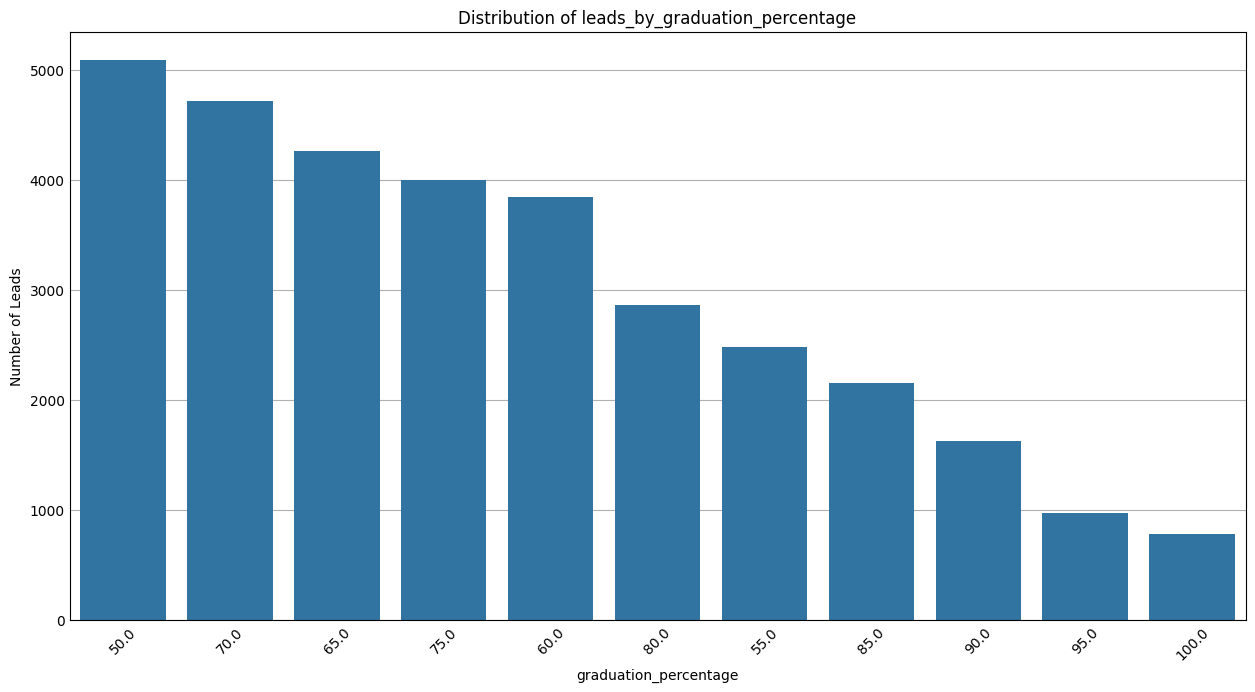

In [44]:
# Plot the distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='graduation_percentage', data=df, order=leads_by_graduation_percentage.index)
plt.title('Distribution of leads_by_graduation_percentage')
plt.xlabel('graduation_percentage')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Replace "10 Years" with "10"
df['work_experience'] = df['work_experience'].replace('10 Years', '10')

# Display the updated DataFrame
print(df)

                                      lead_id        created_time  \
0                          l:3587545764833355 2024-05-02 14:18:00   
1        cc0da387-682c-4530-a79a-1168487410f0 2024-04-30 18:00:07   
2        10045c19-1c8d-4d63-a6bf-62d00a2f50ec 2024-03-21 02:25:55   
3        7e0db362-ebc3-4265-9131-d69bae5eb3f5 2024-03-17 06:40:21   
4        5f74bcc1-08a8-414d-a729-69d5071b4f53 2024-03-20 07:48:39   
...                                       ...                 ...   
32764                      l:1287087698649474 2023-12-29 20:15:00   
32765                       l:752743646765142 2024-01-24 13:37:00   
32766                       l:701943358682733 2024-03-21 06:19:00   
32767  ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6 2024-01-04 03:45:00   
32768                      l:1116793499325062 2024-02-01 14:03:00   

                                                 Ad Name  \
0                               USP_S3_never-been-easier   
1                                                  

In [46]:
# Replace "2 Years" with "2"
df['work_experience'] = df['work_experience'].replace('2 Years', '2')

# Display the updated DataFrame
print(df)

                                      lead_id        created_time  \
0                          l:3587545764833355 2024-05-02 14:18:00   
1        cc0da387-682c-4530-a79a-1168487410f0 2024-04-30 18:00:07   
2        10045c19-1c8d-4d63-a6bf-62d00a2f50ec 2024-03-21 02:25:55   
3        7e0db362-ebc3-4265-9131-d69bae5eb3f5 2024-03-17 06:40:21   
4        5f74bcc1-08a8-414d-a729-69d5071b4f53 2024-03-20 07:48:39   
...                                       ...                 ...   
32764                      l:1287087698649474 2023-12-29 20:15:00   
32765                       l:752743646765142 2024-01-24 13:37:00   
32766                       l:701943358682733 2024-03-21 06:19:00   
32767  ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6 2024-01-04 03:45:00   
32768                      l:1116793499325062 2024-02-01 14:03:00   

                                                 Ad Name  \
0                               USP_S3_never-been-easier   
1                                                  

In [47]:
df['work_experience'] = df['work_experience'].replace('3 Years', '3')

# Display the updated DataFrame
print(df)

                                      lead_id        created_time  \
0                          l:3587545764833355 2024-05-02 14:18:00   
1        cc0da387-682c-4530-a79a-1168487410f0 2024-04-30 18:00:07   
2        10045c19-1c8d-4d63-a6bf-62d00a2f50ec 2024-03-21 02:25:55   
3        7e0db362-ebc3-4265-9131-d69bae5eb3f5 2024-03-17 06:40:21   
4        5f74bcc1-08a8-414d-a729-69d5071b4f53 2024-03-20 07:48:39   
...                                       ...                 ...   
32764                      l:1287087698649474 2023-12-29 20:15:00   
32765                       l:752743646765142 2024-01-24 13:37:00   
32766                       l:701943358682733 2024-03-21 06:19:00   
32767  ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6 2024-01-04 03:45:00   
32768                      l:1116793499325062 2024-02-01 14:03:00   

                                                 Ad Name  \
0                               USP_S3_never-been-easier   
1                                                  

In [48]:
df['work_experience'] = df['work_experience'].replace('1 Year', '1')

# Display the updated DataFrame
print(df)

                                      lead_id        created_time  \
0                          l:3587545764833355 2024-05-02 14:18:00   
1        cc0da387-682c-4530-a79a-1168487410f0 2024-04-30 18:00:07   
2        10045c19-1c8d-4d63-a6bf-62d00a2f50ec 2024-03-21 02:25:55   
3        7e0db362-ebc3-4265-9131-d69bae5eb3f5 2024-03-17 06:40:21   
4        5f74bcc1-08a8-414d-a729-69d5071b4f53 2024-03-20 07:48:39   
...                                       ...                 ...   
32764                      l:1287087698649474 2023-12-29 20:15:00   
32765                       l:752743646765142 2024-01-24 13:37:00   
32766                       l:701943358682733 2024-03-21 06:19:00   
32767  ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6 2024-01-04 03:45:00   
32768                      l:1116793499325062 2024-02-01 14:03:00   

                                                 Ad Name  \
0                               USP_S3_never-been-easier   
1                                                  

In [49]:
df['work_experience'] = df['work_experience'].replace('4 Years', '4')

# Display the updated DataFrame
print(df)

                                      lead_id        created_time  \
0                          l:3587545764833355 2024-05-02 14:18:00   
1        cc0da387-682c-4530-a79a-1168487410f0 2024-04-30 18:00:07   
2        10045c19-1c8d-4d63-a6bf-62d00a2f50ec 2024-03-21 02:25:55   
3        7e0db362-ebc3-4265-9131-d69bae5eb3f5 2024-03-17 06:40:21   
4        5f74bcc1-08a8-414d-a729-69d5071b4f53 2024-03-20 07:48:39   
...                                       ...                 ...   
32764                      l:1287087698649474 2023-12-29 20:15:00   
32765                       l:752743646765142 2024-01-24 13:37:00   
32766                       l:701943358682733 2024-03-21 06:19:00   
32767  ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6 2024-01-04 03:45:00   
32768                      l:1116793499325062 2024-02-01 14:03:00   

                                                 Ad Name  \
0                               USP_S3_never-been-easier   
1                                                  

In [50]:
df['work_experience'] = df['work_experience'].replace('5 Years', '5')

# Display the updated DataFrame
print(df)

                                      lead_id        created_time  \
0                          l:3587545764833355 2024-05-02 14:18:00   
1        cc0da387-682c-4530-a79a-1168487410f0 2024-04-30 18:00:07   
2        10045c19-1c8d-4d63-a6bf-62d00a2f50ec 2024-03-21 02:25:55   
3        7e0db362-ebc3-4265-9131-d69bae5eb3f5 2024-03-17 06:40:21   
4        5f74bcc1-08a8-414d-a729-69d5071b4f53 2024-03-20 07:48:39   
...                                       ...                 ...   
32764                      l:1287087698649474 2023-12-29 20:15:00   
32765                       l:752743646765142 2024-01-24 13:37:00   
32766                       l:701943358682733 2024-03-21 06:19:00   
32767  ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6 2024-01-04 03:45:00   
32768                      l:1116793499325062 2024-02-01 14:03:00   

                                                 Ad Name  \
0                               USP_S3_never-been-easier   
1                                                  

In [51]:
df['work_experience'] = df['work_experience'].replace('6 Years', '6')

# Display the updated DataFrame
print(df)

                                      lead_id        created_time  \
0                          l:3587545764833355 2024-05-02 14:18:00   
1        cc0da387-682c-4530-a79a-1168487410f0 2024-04-30 18:00:07   
2        10045c19-1c8d-4d63-a6bf-62d00a2f50ec 2024-03-21 02:25:55   
3        7e0db362-ebc3-4265-9131-d69bae5eb3f5 2024-03-17 06:40:21   
4        5f74bcc1-08a8-414d-a729-69d5071b4f53 2024-03-20 07:48:39   
...                                       ...                 ...   
32764                      l:1287087698649474 2023-12-29 20:15:00   
32765                       l:752743646765142 2024-01-24 13:37:00   
32766                       l:701943358682733 2024-03-21 06:19:00   
32767  ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6 2024-01-04 03:45:00   
32768                      l:1116793499325062 2024-02-01 14:03:00   

                                                 Ad Name  \
0                               USP_S3_never-been-easier   
1                                                  

In [52]:
df['work_experience'] = df['work_experience'].replace('7 Years', '7')

# Display the updated DataFrame
print(df)

                                      lead_id        created_time  \
0                          l:3587545764833355 2024-05-02 14:18:00   
1        cc0da387-682c-4530-a79a-1168487410f0 2024-04-30 18:00:07   
2        10045c19-1c8d-4d63-a6bf-62d00a2f50ec 2024-03-21 02:25:55   
3        7e0db362-ebc3-4265-9131-d69bae5eb3f5 2024-03-17 06:40:21   
4        5f74bcc1-08a8-414d-a729-69d5071b4f53 2024-03-20 07:48:39   
...                                       ...                 ...   
32764                      l:1287087698649474 2023-12-29 20:15:00   
32765                       l:752743646765142 2024-01-24 13:37:00   
32766                       l:701943358682733 2024-03-21 06:19:00   
32767  ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6 2024-01-04 03:45:00   
32768                      l:1116793499325062 2024-02-01 14:03:00   

                                                 Ad Name  \
0                               USP_S3_never-been-easier   
1                                                  

In [53]:
df['work_experience'] = df['work_experience'].replace('8 Years', '8')

# Display the updated DataFrame
print(df)

                                      lead_id        created_time  \
0                          l:3587545764833355 2024-05-02 14:18:00   
1        cc0da387-682c-4530-a79a-1168487410f0 2024-04-30 18:00:07   
2        10045c19-1c8d-4d63-a6bf-62d00a2f50ec 2024-03-21 02:25:55   
3        7e0db362-ebc3-4265-9131-d69bae5eb3f5 2024-03-17 06:40:21   
4        5f74bcc1-08a8-414d-a729-69d5071b4f53 2024-03-20 07:48:39   
...                                       ...                 ...   
32764                      l:1287087698649474 2023-12-29 20:15:00   
32765                       l:752743646765142 2024-01-24 13:37:00   
32766                       l:701943358682733 2024-03-21 06:19:00   
32767  ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6 2024-01-04 03:45:00   
32768                      l:1116793499325062 2024-02-01 14:03:00   

                                                 Ad Name  \
0                               USP_S3_never-been-easier   
1                                                  

In [54]:
df['work_experience'] = df['work_experience'].replace('9 Years', '9')

# Display the updated DataFrame
print(df)

                                      lead_id        created_time  \
0                          l:3587545764833355 2024-05-02 14:18:00   
1        cc0da387-682c-4530-a79a-1168487410f0 2024-04-30 18:00:07   
2        10045c19-1c8d-4d63-a6bf-62d00a2f50ec 2024-03-21 02:25:55   
3        7e0db362-ebc3-4265-9131-d69bae5eb3f5 2024-03-17 06:40:21   
4        5f74bcc1-08a8-414d-a729-69d5071b4f53 2024-03-20 07:48:39   
...                                       ...                 ...   
32764                      l:1287087698649474 2023-12-29 20:15:00   
32765                       l:752743646765142 2024-01-24 13:37:00   
32766                       l:701943358682733 2024-03-21 06:19:00   
32767  ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6 2024-01-04 03:45:00   
32768                      l:1116793499325062 2024-02-01 14:03:00   

                                                 Ad Name  \
0                               USP_S3_never-been-easier   
1                                                  

In [55]:
# check invalid valuse
for col in df:
  print(f"{col} has {df[col].nunique()} unique value")

lead_id has 32769 unique value
created_time has 29997 unique value
Ad Name has 134 unique value
campaign_name has 40 unique value
form_name has 16 unique value
platform has 3 unique value
lead_id.1 has 32769 unique value
graduation_degree has 17 unique value
graduation_percentage has 11 unique value
work_experience has 27 unique value
mapped has 1 unique value
contacted has 1 unique value
lsq_lead_stage has 29 unique value
lsq_lead_owner has 85 unique value
lsq_source has 51 unique value
hour has 24 unique value
part_of_day has 4 unique value
year has 2 unique value


In [56]:
# Save DataFrame to CSV
df.to_csv('updated_leads_generated_data.csv', index=False)